In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

tickers = ['msft', 'aapl']
stock_data = yf.download(tickers, start="2020-06-7", end="2021-06-7")

[*********************100%***********************]  2 of 2 completed


In [2]:
stock_data.head()

Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-06-08  82.807037  186.553680  83.364998  188.360001  83.400002   
2020-06-09  85.421921  187.979889  85.997498  189.800003  86.402496   
2020-06-10  87.619614  194.952362  88.209999  196.839996  88.692497   
2020-06-11  83.412964  184.483734  83.974998  186.270004  87.764999   
2020-06-12  84.133095  185.939621  84.699997  187.740005  86.949997   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2020-06-08  188.550003  81.830002  184.440002  82.562500  185.940002   
2020-06-09  190.699997  83.002502  187.259995  83.035004  188.000000   
2020-06-10  198.520004  86.522499  191.009995  86.974998  191.130005   
2020-06-11  195.759995  83.870003  186.070007  87.327499  193.130005   
2020-06-12  191.720001  83.555000  185.179993  86.180000  190.539993   

               Volume            
                 AAPL      MSFT  
Date                             
2020-06-08   95654400  33211600  
2020-06-09  147712400  29783900  
2020-06-10  166651600  43872300  
2020-06-11  201662400  52854700  
2020-06-12  200146000  43373600

<AxesSubplot:xlabel='Date'>

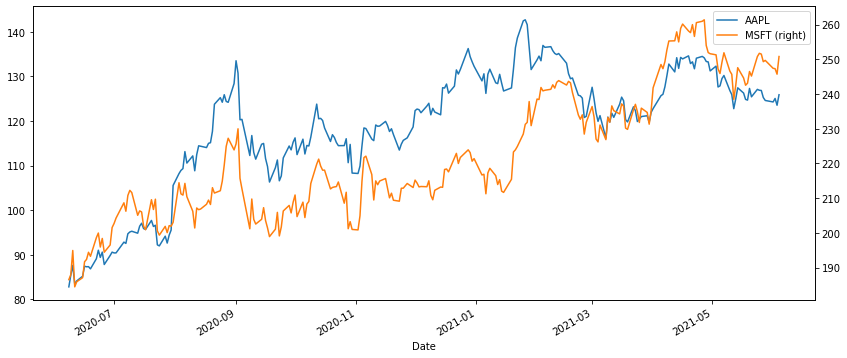

In [3]:
stock_data['Adj Close'].plot(secondary_y='MSFT', figsize=(14,6))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

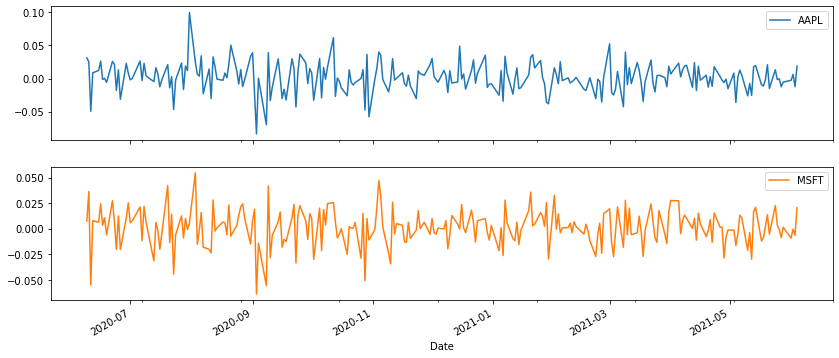

In [4]:
returns = np.log(stock_data['Adj Close']/ stock_data['Adj Close'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>,
        <AxesSubplot:xlabel='MSFT', ylabel='MSFT'>]], dtype=object)

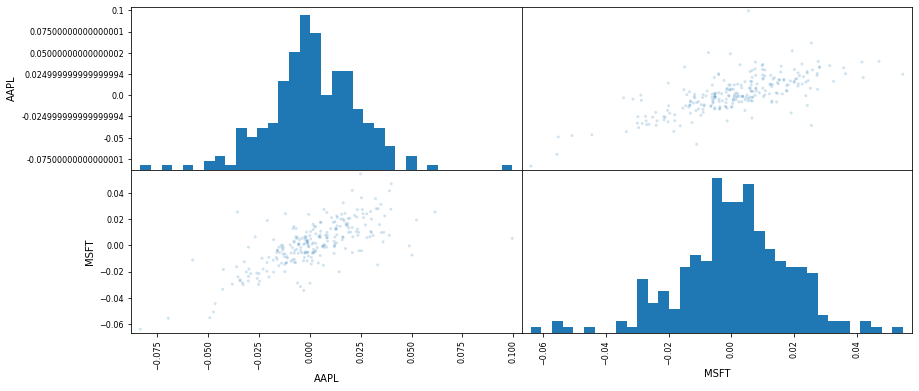

In [5]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

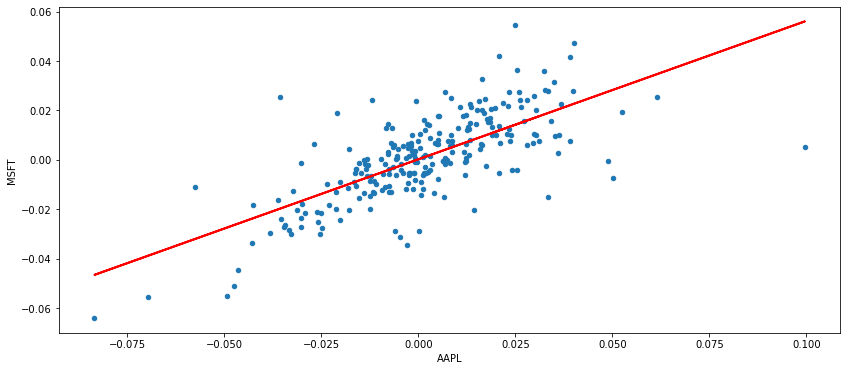

In [6]:
regression = np.polyfit(returns['AAPL'], returns['MSFT'], deg=1)

ax = returns.plot(kind='scatter', x= 'AAPL', y='MSFT', figsize=(14,6))
ax.plot(returns['AAPL'], np.polyval(regression, returns['AAPL']), 'r', lw=2)

In [7]:
returns.corr()

,AAPL,MSFT
AAPL,1.000000,0.707269
MSFT,0.707269,1.000000


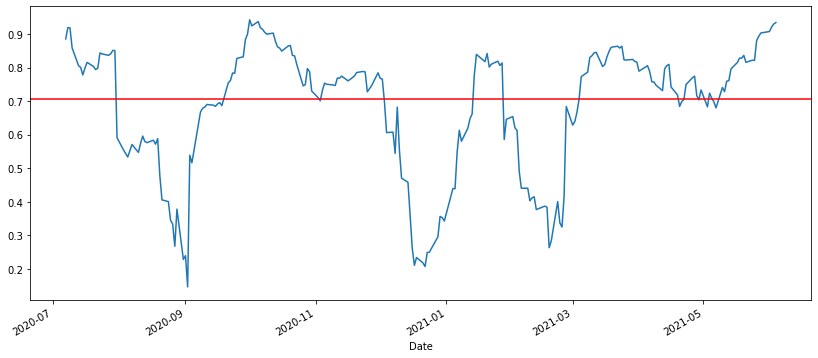

In [8]:
ax = returns['AAPL'].rolling(window=20).corr(returns['MSFT']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')